# Partitions

I might have figured this project would take me here eventually. In fact, it might be a wee bit startling it hadn't yet. But we need to talk about partitions. I need to wrap my head around them...

In [1]:
# bloody dependencies
import graphviz
import matplotlib.pyplot as plt
import networkx
import numpy as np

In [65]:
class Partition:
    def __init__(self, k: list):
        self.k = k
        
    def __eq__(self, other):
        return self.k == other.k
    
    @property
    def parts(self):
        return sum([[part+1] * repeats for part, repeats in enumerate(self.k)], [])[::-1]
    
    @property
    def n(self):
        return sum(self.parts)
    
    @property
    def identifier(self):
        primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53]
        return np.prod([primes[i] ** k_i for i, k_i in enumerate(self.k)])
    
    @property
    def equation(self):
        if self.n == 0:
            return "0 = 0"
        return f"{self.n} = " + " + ".join([str(part) for part in self.parts])
    
    @property
    def encoding(self):
        if self.n == 0:
            return "0{}"
        return f"{self.n}{{" + ",".join([str(k_i) for k_i in self.k]) + "}"
    
    @property
    def __dict__(self):
        return {
            "identifier": self.identifier,
            "n": self.n,
            "k": self.k,
            "parts": self.parts,
            "equation": self.equation,
            "encoding": self.encoding,
        }
        
    def __repr__(self):
        return self.encoding
    
    def calculate_child(self, index: int, max_size: int = None, max_parts: int = None):
        
        # calculation not in-place
        k = self.k.copy()
        
        # can't take from zero
        if index > 0:
            k[index-1] -= 1
            if k[index-1] < 0:
                return None
            
        # increment or append
        if index < len(k):
            if max_parts and sum(k) >= max_parts:
                return None
            k[index] += 1
        else:
            if max_size and len(k) >= max_size:
                return None
            k += [1]
            
        # return
        return k
    
    def calculate_children(self, max_size: int = None, max_parts: int = None):
        children = [self.calculate_child(index, max_size, max_parts) for index in range(len(self.k)+1)]
        children = [child for child in children if child is not None]
        return [Partition(child) for child in children]
    
λ = Partition([3, 2])
print(λ)
print()
max_size, max_parts = 2, 5
λ_children = λ.calculate_children(max_size, max_parts)
for λ_child in λ_children:
    print(λ_child)

7{3,2}

8{2,3}


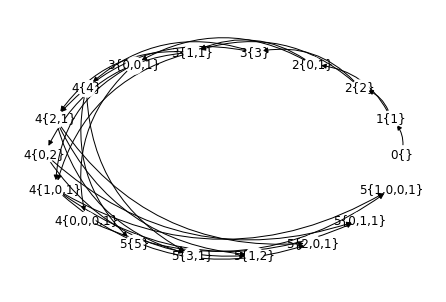

In [66]:
# initialize lattice
nodes = []
lattice = networkx.DiGraph()

# root node
root = Partition([])
nodes.append(root)
lattice.add_node(root.identifier, label=str(root), **root.__dict__)

# create children by walking the tree out to a specified depth
max_size, max_parts = 4, 13
limit = 5
for node in nodes:
    node.children = []
    if node.n < limit:
        children = node.calculate_children(max_size, max_parts)
        for child in children:
            node.children.append(child)
            if child not in nodes:
                nodes.append(child)
                lattice.add_node(child.identifier, label=str(child), **child.__dict__)
                
# set parents
for parent in nodes:
    for child in parent.children:
        lattice.add_edge(parent.identifier, child.identifier)
        
# visualize
options = {
    "node_color": "#ffffff",
    "connectionstyle": "arc3,rad=0.3"
}
labels = networkx.get_node_attributes(lattice, "label")
pos = networkx.circular_layout(lattice)
networkx.draw(lattice, labels=labels, pos=pos, **options)

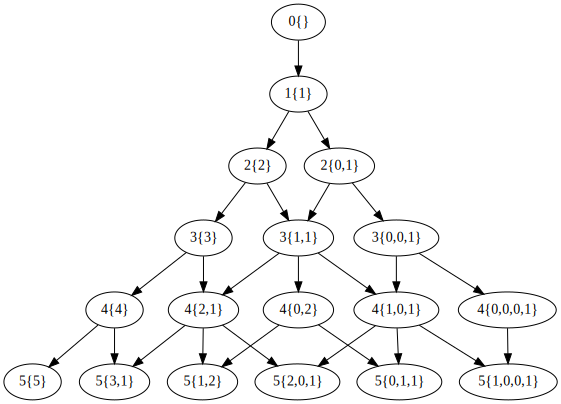

In [67]:
viz = graphviz.Digraph(comment="Young's Lattice")
for node in nodes:
    viz.node(str(node))
for parent in nodes:
    for child in parent.children:
        viz.edge(str(parent), str(child))
viz

In [69]:
lattice.nodes[15]

{'label': '5{0,1,1}',
 'identifier': 15,
 'n': 5,
 'k': [0, 1, 1],
 'parts': [3, 2],
 'equation': '5 = 3 + 2',
 'encoding': '5{0,1,1}'}